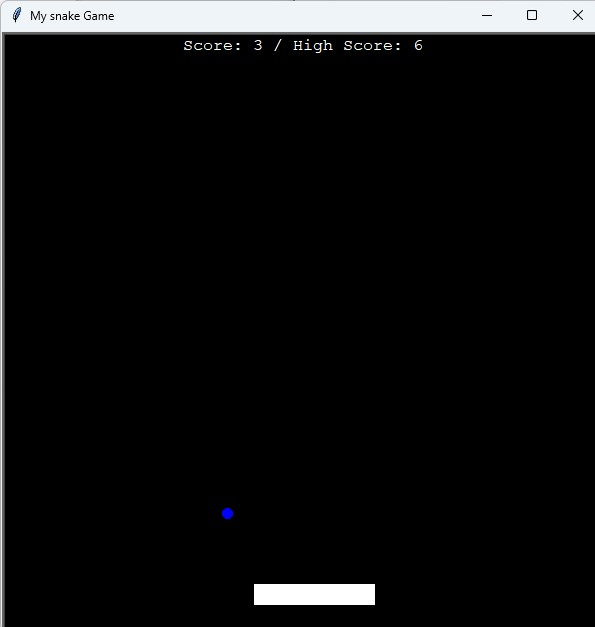

In [1]:
# day24_Working with local files and directories_240726
# Better snake game

# Playing scence of the game
from PIL import Image
from IPython.display import display
img = Image.open('upgrade_snake_game.jpg')
display(img)

In [ ]:
# my solution to upgrade the game
# main.py
import time
from turtle import Screen, Turtle
from snake import Snake
from food import Food
from scoreboard import Scoreboard

# screen setup
screen = Screen()
screen.setup(width=600, height=600)
screen.bgcolor("black")
screen.title("My snake Game")
screen.tracer(0)

# Part2. Move the snake
snake = Snake()
food = Food()
scoreboard = Scoreboard()

# Park3. Control the snake
screen.listen()
screen.onkey(snake.up, "Up")
screen.onkey(snake.down, "Down")
screen.onkey(snake.left, "Left")
screen.onkey(snake.right, "Right")

while True:

    game_is_on = True
    while game_is_on:
        screen.update()
        time.sleep(0.1)
        snake.move()
        # Part4. Detect collision with food
        if snake.head.distance(food) < 15:  # get error when snake.head().distance(food)!!!
            food.refresh()
            snake.extend()
            # Part5. Create a scoreboard
            scoreboard.increase_score()

        # Part6. Detect collision with wall
        if snake.head.xcor() > 290 or snake.head.xcor() <-290 or snake.head.ycor() > 290 or snake.head.ycor() < -290:
            game_is_on = False
            # scoreboard.game_over()

        # Part7. Detect collision with tail
        for segment in snake.segments[1:]:
            if snake.head.distance(segment) < 10 :
                game_is_on = False
                # scoreboard.game_over()

    scoreboard.update_highscore()
    scoreboard.reset_score()
    snake.new_snake()
    food.refresh()

# screen.exitonclick()

# reflection
# I could have joined two functions update_highscore and reset_score together.
# She used 'goto' methods to get rid of the past turtle but I used 'hideturtle' method to remove the turtle. Both would be okay.

In [ ]:
# scoreboard.py
from turtle import Turtle
ALIGNMENT = "center"
FONT = ("Courier", 12, "normal")

class Scoreboard(Turtle):
    def __init__(self):
        super().__init__()
        self.goto(0, 280)
        self.hideturtle()
        self.color("white")
        self.score = 0
        self.update_scorebaord()
        self.high_score = 0

    def update_scorebaord(self):
        self.write(f"Score: {self.score}", move=False, align=ALIGNMENT, font=FONT)

    def increase_score(self):
        self.score += 1
        self.clear()
        if self.high_score == 0: # this part is revised 
            self.update_scorebaord()
        else:
            self.update_scoreboard_ver2()

    # def game_over(self):
    #     self.goto(0, 0)
    #     self.write("GAME OVER", align=ALIGNMENT, font=FONT)

    def update_highscore(self):
        if self.score >= self.high_score:
            self.high_score = self.score

    # under two functions are new
    def update_scoreboard_ver2(self):
        self.write(f"Score: {self.score} / High Score: {self.high_score}", move = False, align=ALIGNMENT, font=FONT)

    def reset_score(self):
        self.score = 0
        self.clear()
        self.update_scoreboard_ver2()

In [ ]:
# snake.py
from turtle import Turtle
STARTING_POSITION = [(0, 0), (-20, 0), (-40, 0)]  # used tuples
MOVE_DISTANCE = 20
# snake can't move reverse direction(180 degree)
UP = 90
DOWN = 270
LEFT = 180
RIGHT = 0


class Snake:
    def __init__(self):
        self.segments = []
        self.create_snake()
        self.head = self.segments[0]

    def create_snake(self):
        for position in STARTING_POSITION:
            self.add_segment(position)

    def add_segment(self, position):
        new_segment = Turtle("square")
        new_segment.color("white")
        new_segment.penup()
        new_segment.goto(position)
        self.segments.append(new_segment)


    def extend(self): # add a new segment to the snake
        self.add_segment(self.segments[-1].position())


    def move(self):
        for seg_num in range(len(self.segments)-1, 0, -1):
            new_x = self.segments[seg_num - 1].xcor()
            new_y = self.segments[seg_num - 1].ycor()
            self.segments[seg_num].goto(new_x, new_y)
        self.head.forward(MOVE_DISTANCE)

    def up(self):
        if self.head.heading() != DOWN:
            self.head.setheading(UP)
        # self.move() _ it doesn't need

    def down(self):
        if self.head.heading() != UP:
            self.head.setheading(DOWN)

    def right(self):
        if self.head.heading() != LEFT:
            self.head.setheading(RIGHT)

    def left(self):
        if self.head.heading() != RIGHT:
            self.head.setheading(LEFT)

    # this is new function 
    def new_snake(self): 
        for seg in self.segments:
            seg.hideturtle()
        self.segments=[]
        self.create_snake()
        self.head = self.segments[0]


In [ ]:
# food.py _nothing changed
from turtle import Turtle
import random

class Food(Turtle):
    # food generated at random location when eaten
    def __init__(self):
        super().__init__()
        self.shape("circle")
        self.penup()
        self.shapesize(stretch_len=0.5, stretch_wid=0.5)
        self.color("blue")
        self.speed("fastest")
        random_x = random.randint(a=-280,b=280)
        random_y = random.randint(a=-280,b=280)
        self.goto(random_x, random_y)

    def refresh(self):
        random_x = random.randint(-280, 280)
        random_y = random.randint(-280, 280)
        self.goto(random_x, random_y)

In [ ]:
file = open("my_file.txt")
contents = file.read()
print(contents)
file.close()
# when we opened a file, we need to close it finally.
# because it takes resource to keep it open.

# many Python developers opt for(선택하다) is a different way of opening the file. using 'with' keyword
with open("my_file.txt") as file:
    contents = file.read()
    print(contents)
    # no need to use close()

In [ ]:
# What if we want to write something in the file?
with open("my_file.txt", mode="w") as file: # default mode is reading
    file.write("New text.")
    # mode = "w" replaces all of the texts in the file
    # if we want to keep the existing texts, then we can use mode = "a" which stands for append

In [ ]:
# files and folders
# files can live in folders
# File Path
# Root folder 
# Absolute File path /
# relative file path. standard is working directory ./
# for example, talk.ppt file is in the Project folder. If Project folder is the working directory, the relative path of the talk.ppt is ./talk.ppt
# what if we want to go up?
# for example, there are report.doc and Project folder in the Work folder. And the working directory is Project folder.
# In this case, if we want to approach to the report.doc, we could type ../report.doc

In [3]:
with open("new_file.txt", mode="w") as file:
    file.write("My name is MOON CY")
# new_file.txt was shifted to the 'Desktop'

In [4]:
# use absolute file path to make the code work
with open("/Users/user/Desktop/new_file.txt") as file: #C:\Users\user\Desktop
    contents= file.read()
    print(contents)
# in Mac using forward slash '/' but in Window using backword slash'\'. Howerer, in python, we using only forward slash '/'

My name is MOON CY


In [8]:
# use relative file path to make the code work with the same file
with open("../../../Desktop/new_file.txt") as file: # "C:\Users\user\Desktop\Python_Bootcamp\day24\day24_Working with local files and directories_240726.ipynb"
    contents = file.read()
    print(contents)

My name is MOON CY


In [ ]:
with open("my_file.txt", mode="a") as file:
    file.write("\nWow.")

In [ ]:
# way to make a new file
with open("new_file.txt", mode = "w") as file:
    file.write("New text.")
    # cf. only possible in mode = "w"

In [ ]:
# The main difference between Absolute and Relative path is that 
# Absolute is always rooted form the computer
# Relative depends on working directory

In [ ]:
#TODO: Create a letter using starting_letter.txt _my sloution
#for each name in invited_names.txt
#Replace the [name] placeholder with the actual name.
#Save the letters in the folder "ReadyToSend".

with open("./Input/Names/invited_names.txt") as names:
    name_list = names.readlines()
    # name_list = ['Aang\n', 'Zuko\n', 'Appa\n', 'Katara\n', 'Sokka\n', 'Momo\n', 'Uncle Iroh\n', 'Toph']
    # erasing '\n' in each element
    name_list = [item.strip() for item in name_list] # Copilot solution
    # print(name_list) # ['Aang', 'Zuko', 'Appa', 'Katara', 'Sokka', 'Momo', 'Uncle Iroh', 'Toph']

with open("./Input/Letters/starting_letter.txt") as starting_letter:
    letter_form = starting_letter.readlines()
    # print(letter_form)
    letter_form[0] = letter_form[0][0:5]
    # print(letter_form)

for p in name_list:
    with open(f"./Output/ReadyToSend/letter_for_{p}.txt", mode="a") as letter:
        letter_form.insert(1, p)
        letter_form.insert(2,"\n")
        for e in letter_form:
            letter.write(e)
        del letter_form[1]

# reflection
# teacher also used strip() like me to remove '\n'
# teacher set the placement words '[name]' and utilized replace method.
# I approached the problem in the list based thinking. replace could be better in some case like this case.
# Well done to trace the relative paths of the files

In [ ]:
#TODO: Create a letter using starting_letter.txt _teacher solution
PLACEHOLDER = "name"

with open("./Input/Names/invited_names.txt") as names_file:
    names = names_file.readlines()

with opne("/Input/Letters/starting_letter.txt") as letter_file:
    letter_contents = letter_file.read()
    for name in names:
        stripped_name = name.strip()
        new_letter = letter_contents.replace(PLACEHOLDER, stripped_name)
        with open(f"./Output/ReadyToSend/letter_for_{stripped_name}.txt", mode="w") as completed_letter:
            completed_letter.write(new_letter)